In [836]:
%matplotlib inline

import seaborn as sns
import pickle

import numpy as np
import scipy as sp
import nibabel as nib
import pandas as pd
import cv2
import numpy.ma as ma

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from scipy import misc
from scipy.cluster.hierarchy import dendrogram
from scipy import ndimage
from scipy import signal
from sklearn.datasets import load_iris
from scipy import stats
from collections import Counter

from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import *
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.metrics import silhouette_samples, silhouette_score, pairwise_distances
from sklearn.metrics import davies_bouldin_score


sns.set(font_scale=1.4)
sns.set_style("whitegrid", {'axes.grid' : False})

In [837]:
np.set_printoptions(threshold=np.inf)

In [838]:
nibfile = nib.load("/Users/hanam/Documents/tract_clustering_3/C2/Volume4D_sym_cleaned.nii.gz")
data = nibfile.get_data()
mask= nib.load("/Users/hanam/Documents/Tracts_testing_2/all_levels/C2/BW_mask.nii.gz")
maskdata= mask.get_data()

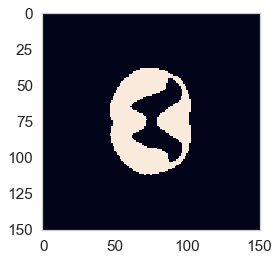

In [839]:
img= plt.imshow(maskdata)

In [840]:
maskdata= np.rot90(maskdata, 1, (1,0))

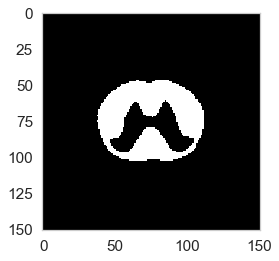

In [841]:
plt.imshow(maskdata, cmap="gray")

In [842]:
maskdata= maskdata[:, :maskdata.shape[1]//2]

In [843]:
data.shape

(151, 151, 1, 6)

In [844]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

In [845]:
feature_names = [
    "number_axons",
    "axon_equiv_diameter",
    "avf",
    "g_ratio",
    "myelin_thickness",
    "mvf",
]

In [846]:
data = data.transpose((1, 0, 2, 3))

# Ignore solidity, eccent., orient., etc.
#data = data[..., 0:6]
data = data.squeeze(axis=2)

In [847]:
data= data[:, :data.shape[1]//2, :]

In [848]:
data.shape

(151, 75, 6)

In [849]:
original_shape = data.shape[0:2]

print original_shape

(151, 75)


In [850]:
h1= 35
h2= 115
w1= 0
w2= 180

In [851]:
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)

(151, 75, 6)
(151, 75, 6)
(151, 75, 6)
(151, 75, 6)
(151, 75, 6)
(151, 75, 6)


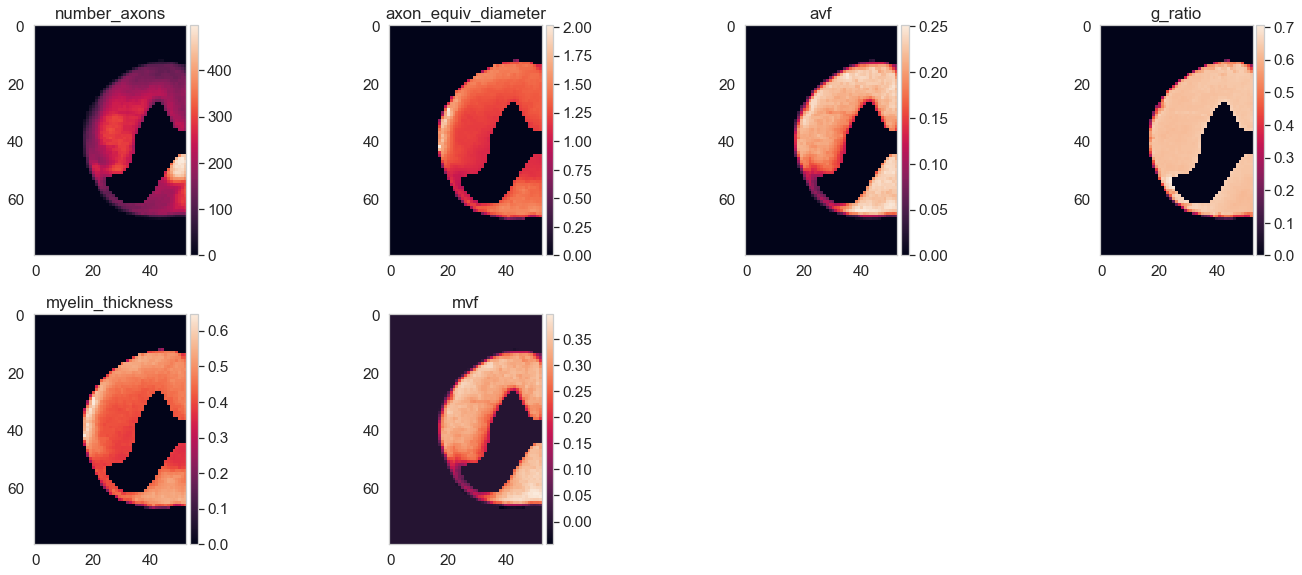

In [852]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(1, data.shape[2]+1):
    
    image= np.where(maskdata, data[...,i-1], 0)
    data[..., i-1]= np.where(maskdata, data[..., i-1], 0)
    im_crop= crop_center(data[..., i-1], w2-w1, h2-h1)
    print data.shape
    
    ax = fig.add_subplot(5, 4, i)
    
    #ndimage.median_filter(data,size=20)
    
    #signal.medfilt(data, 5)
    #im_crop[i , ...]= im_crop(mask[...])

           
    img = ax.imshow(im_crop)
    
   
    # Center line
    #ax.axvline(original_shape[1] // 2) 
    plt.title(feature_names[i-1])
    colorbar(img)

plt.tight_layout(h_pad=1)

In [853]:
connectivity = grid_to_graph(n_x=data.shape[0],
                             n_y=data.shape[1])

In [854]:
connectivity

<11325x11325 sparse matrix of type '<type 'numpy.int64'>'
	with 56173 stored elements in COOrdinate format>

In [855]:
data= data.reshape(-1, data.shape[2])

In [856]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [857]:
data.shape

(11325, 6)

# t-SNE

In [858]:
# data_embedded = TSNE(n_components=2, verbose=3, perplexity=40).fit_transform(data)

In [859]:
num_clusters = 10
clustering = AgglomerativeClustering(linkage="ward", n_clusters=10,
                                         connectivity= connectivity)
                                        
clustering.fit(data)
labels = clustering.labels_ 
#silhouette= silhouette_score(connectivity, labels)

In [860]:
# plt.figure(figsize=(12, 8))
# plt.scatter(data_embedded[:, 0], data_embedded[:, 1],
#             cmap="Spectral", s=10, c=clustering.labels_)
# plt.title("t-SNE without spatial information")
# plt.show()

In [861]:
data.shape

(11325, 6)

In [862]:
data[...,0].shape

(11325,)

In [863]:
# data[data!=frequent].shape

In [864]:
# data[data[...,1]!=frequent].shape

In [865]:
# frequent= stats.mode(data[...,1])[0]
# frequent= frequent[0]
# print frequent
# data[..., 0]= data[data[...,0]!=frequent]

In [866]:
# data

In [867]:
# for i in range(0,5):
#     frequent= stats.mode(data[...,i])[0]
#     frequent= frequent[0]
#     print frequent
#     data[..., i]= data[data[...,i]!=frequent]

In [868]:
labels.shape

(11325,)

In [869]:
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [870]:
# labels= labels[labels!=frequent]

In [871]:
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [872]:
labels.shape

(11325,)

In [873]:
frequent= stats.mode(labels)[0]
frequent= frequent[0]
print frequent

3


In [874]:
silhouette= silhouette_score(data,labels!=frequent)
print silhouette

0.86437947


In [875]:
labels = labels.reshape(*original_shape)

In [876]:
labels.shape

(151, 75)

In [877]:
labels= labels.astype(float)

In [878]:
labels[labels==frequent]= np.nan

In [879]:
labels

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
      

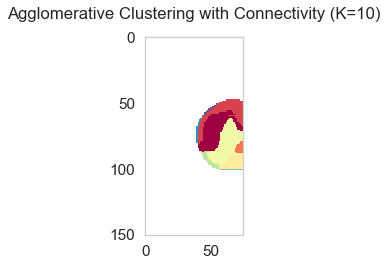

In [880]:
plt.imshow(labels, cmap="Spectral")
plt.title("Agglomerative Clustering with Connectivity (K={})".format(num_clusters), pad=18)
plt.tight_layout()

In [881]:
## Plot Dendogram

#This example plots the corresponding dendrogram of a hierarchical clustering
#using AgglomerativeClustering and the dendrogram method available in scipy.


# def plot_dendrogram(model, **kwargs):

#     # Children of hierarchical clustering
#     children = model.children_

#     # Distances between each pair of children
#     # Since we don't have this information, we can use a uniform one for plotting
#     distance = np.arange(children.shape[0])

#     # The number of observations contained in each cluster level
#     no_of_observations = np.arange(2, children.shape[0]+2)

#     # Create linkage matrix and then plot the dendrogram
#     linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

#     # Plot the corresponding dendrogram
#     dendrogram(linkage_matrix, **kwargs)


# iris = load_iris()
# x = iris.data[:20]
# model = AgglomerativeClustering(n_clusters=3)

# model = model.fit(x)
# plt.title('Hierarchical Clustering Dendrogram')
# plot_dendrogram(model, labels=model.labels_)
# plt.show()

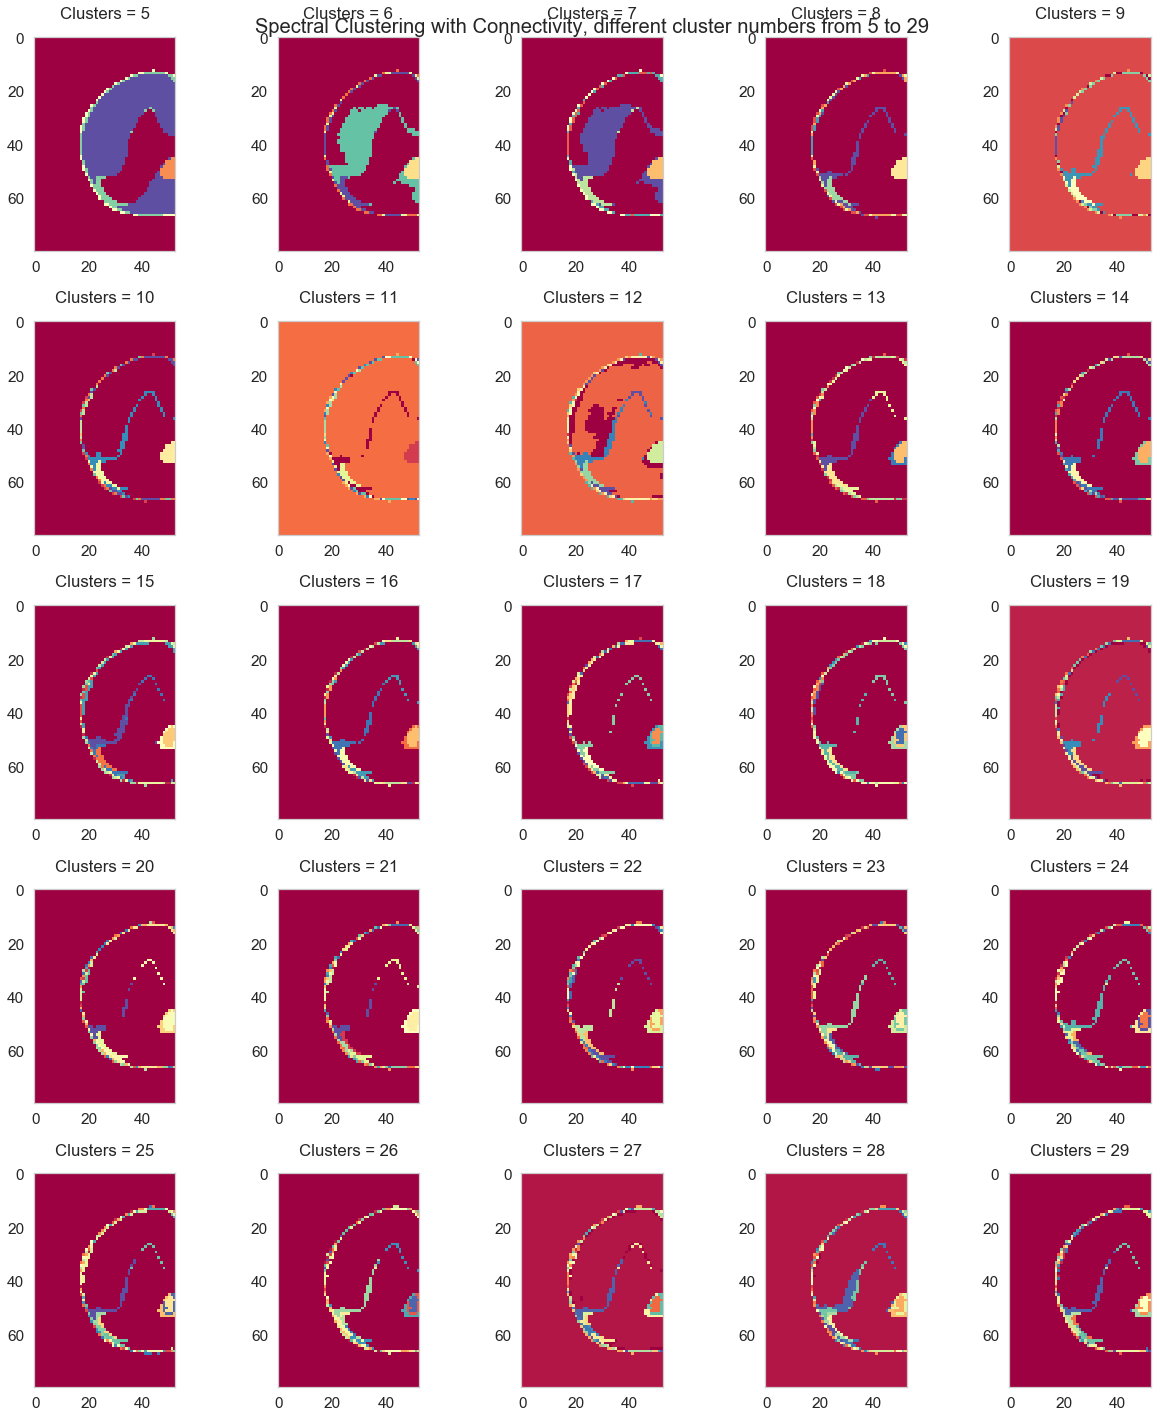

In [885]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(1, 26):
    clustering = SpectralClustering(n_clusters=i+4)
                                        
    clustering.fit(data)
    labels = clustering.labels_
    frequent= stats.mode(labels)[0]
    frequent= frequent[0]
#     print frequent
    
   # Find the foreground rows
    frgrd_idx = [idx for idx,l in enumerate(labels) if l != frequent]
    # Extract the foreground rows from data
    frgrd_data = data[frgrd_idx, :]
    # Extract the foreground rows from labels
    frgrd_labels = labels[frgrd_idx]
    
#     silhouette= silhouette_score(frgrd_data,labels=frgrd_labels)
#     print silhouette
    
    
    
# #     calinski= metrics.calinski_harabasz_score(data, labels!=frequent)
# #     print("calinski-harabasz score=", calinski)
    
#     davies= davies_bouldin_score(data,labels)
#     print davies
    


    labels = labels.reshape(*original_shape)
    labels= labels.astype(float)
#     labels[labels==frequent]= np.nan
    im_crop= crop_center(labels, w2-w1, h2-h1)

    ax = fig.add_subplot(5, 5, i)
    img = ax.imshow(im_crop, cmap="Spectral")
    plt.title("Clusters = {}".format(i+4), pad=18)
    plt.tight_layout()
    

plt.suptitle("Spectral Clustering with Connectivity, different cluster numbers from 5 to 29")
plt.tight_layout(h_pad=1)

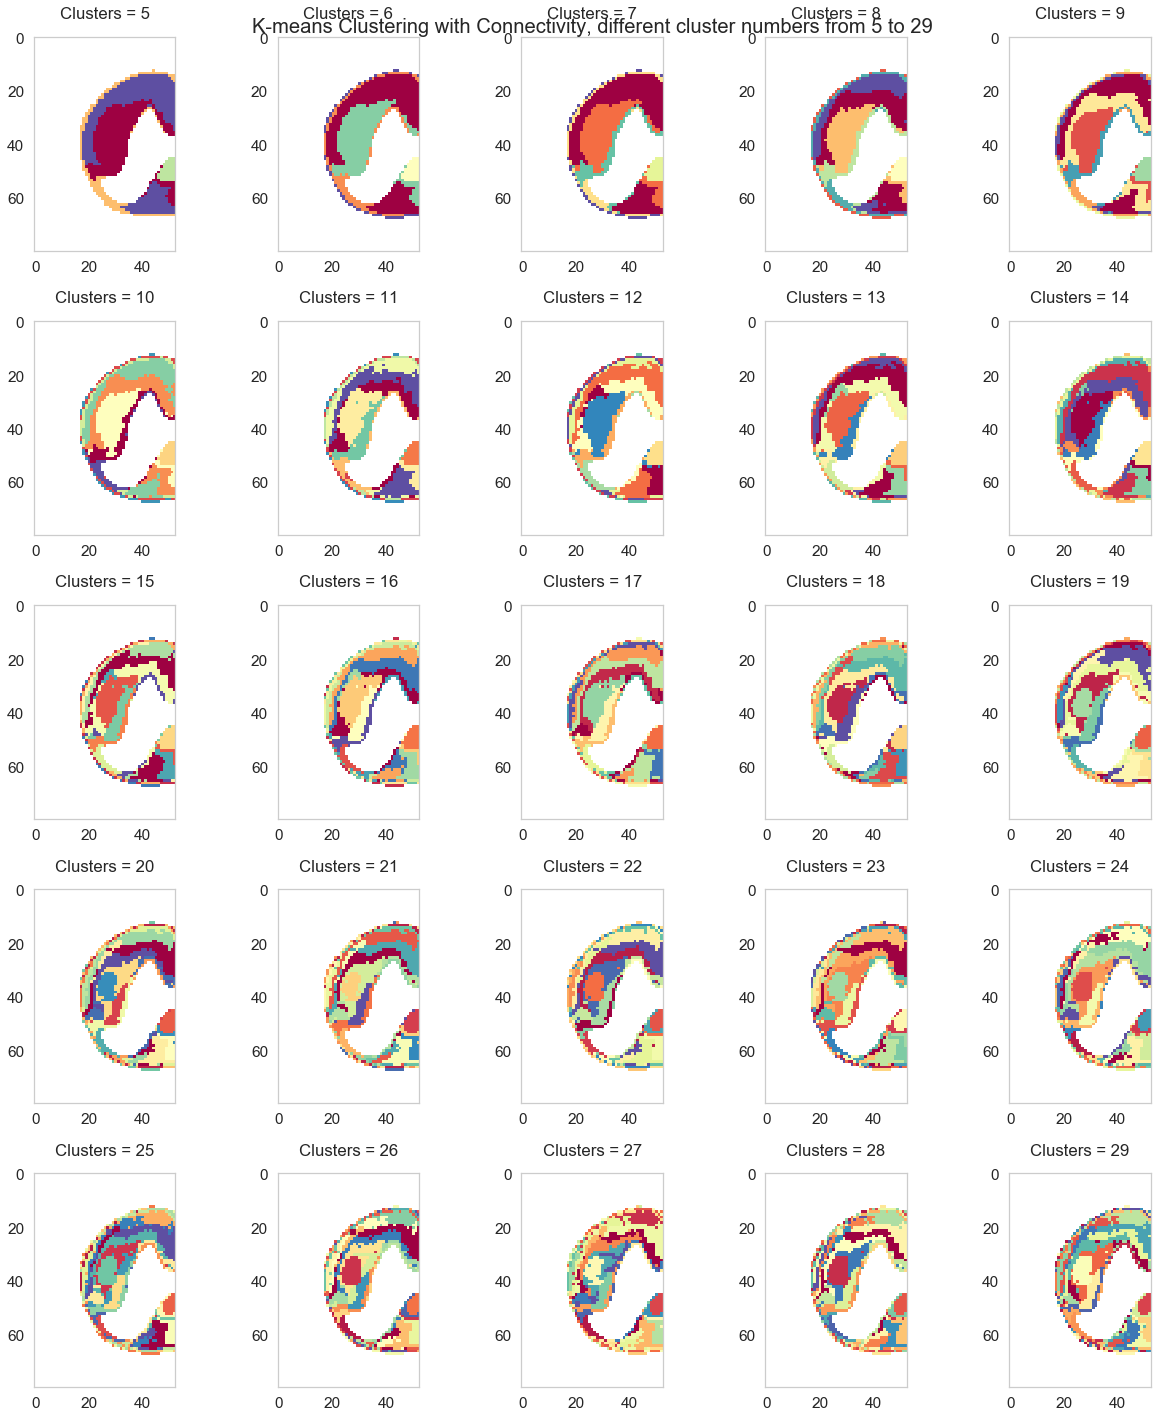

In [883]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(1, 26):
    clustering = KMeans(n_clusters=i+4)
                                        
    clustering.fit(data)
    labels = clustering.labels_ 
    
    frequent= stats.mode(labels)[0]
    frequent= frequent[0]
#     print frequent
    
   # Find the foreground rows
    frgrd_idx = [idx for idx,l in enumerate(labels) if l != frequent]
    # Extract the foreground rows from data
    frgrd_data = data[frgrd_idx, :]
    # Extract the foreground rows from labels
    frgrd_labels = labels[frgrd_idx]
    
#     silhouette= silhouette_score(frgrd_data,labels=frgrd_labels)
#     print silhouette
    
    

    
# #     calinski= metrics.calinski_harabasz_score(data, labels!=frequent)
# #     print("calinski-harabasz score=", calinski)
    
#     davies= davies_bouldin_score(data,labels)
#     print davies

    labels= labels.astype(float)
    labels[labels==frequent]= np.nan
    
    labels = labels.reshape(*original_shape)
#     labels= labels.astype(float)
#     labels[labels==frequent]= np.nan
    im_crop= crop_center(labels, w2-w1, h2-h1)

    ax = fig.add_subplot(5, 5, i)
    img = ax.imshow(im_crop, cmap="Spectral")
    plt.title("Clusters = {}".format(i+4), pad=18)
    plt.tight_layout()
    

plt.suptitle("K-means Clustering with Connectivity, different cluster numbers from 5 to 29")
plt.tight_layout(h_pad=1)